# 6.5 Unsupervised Machine Learning - Clustering

## Table of contents
1. [Importing Libraries & Data](#imports)
2. [Data wrangling](#paragraph1)
3. [The elbow technique](#paragraph2)
4. [k-means clustering](#paragraph3)
5. [Visualisations](#paragraph4)
6. [Summary & Outlook](#paragraph5)

### 1. Importing Libraries & Data <a name="imports"></a>

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [84]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [85]:
path = r'C:\Users\deuts\Desktop\Airbnb'

In [86]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_df.pkl'))

### 2. Data Wrangling <a name="paragraph1"></a>

In [87]:
# Displaying head of data set
pd.set_option('display.max_columns', 500)
df.head()

,id,name,host_id,host_since,street,neighbourhood,city,state,zipcode,country,latitude,longitude,property_type,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month,price_group
0,145320,In the middle of it all - with a view!,703851,2011-06-15,"Stockholm, Stockholms laen, Sweden",Soedermalm,Stockholm,Stockholms laen,118 53,Sweden,5.931.364,1.805.256,Apartment,1.0,1285.0,2,0,72,97.0,1,2,High Price
2,170651,Petit Charm Rooftop next to heaven,814021,2011-07-13,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11737,Sweden,5.931.568,1.803.138,Apartment,1.0,745.0,3,197,32,93.0,1,0,Middle Price
3,206221,Doubleroom at Soedermalm &trendySofo,1022374,2011-08-26,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11639,Sweden,5.931.226,1.807.942,Bed and breakfast,1.0,667.0,3,332,78,98.0,1,0,Middle Price
4,220851,One room in appartement,412283,2011-02-27,"Stockholm, Stockholm County, Sweden",Kungsholmen,Stockholm,Stockholm County,11341,Sweden,5.933.376,1.803.816,Apartment,1.0,598.0,3,336,45,93.0,1,0,Middle Price
5,259722,Near shopping-IT Business(Bunk bed),1261494,2011-10-07,"Stockholm, Stockholm County, Sweden",Rinkeby-Kista,Stockholm,Stockholm County,16474,Sweden,5.941.003,179.366,Apartment,1.0,226.0,21,307,23,92.0,1,0,Low Price


In [88]:
df.describe()

,id,host_id,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month
count,5.213000e+03,5.213000e+03,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000
mean,1.872682e+07,6.822836e+07,1.400537,990.957990,3.094763,58.556302,15.681565,95.672549,1.271053,0.623250
std,1.063092e+07,7.239442e+07,1.009707,525.615798,2.531050,103.378739,21.688435,6.544259,1.015233,1.246335
min,1.453200e+05,9.842000e+03,0.000000,98.000000,1.000000,0.000000,1.000000,20.000000,1.000000,0.000000
25%,9.400718e+06,1.468859e+07,1.000000,598.000000,2.000000,0.000000,3.000000,94.000000,1.000000,0.000000
50%,1.886122e+07,3.715448e+07,1.000000,902.000000,2.000000,0.000000,7.000000,98.000000,1.000000,0.000000
75%,2.666322e+07,9.777807e+07,2.000000,1197.000000,4.000000,69.000000,18.000000,100.000000,1.000000,1.000000
max,3.796416e+07,2.871015e+08,10.000000,2992.000000,21.000000,365.000000,135.000000,100.000000,10.000000,9.000000


In [89]:
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'street', 'neighbourhood',
       'city', 'state', 'zipcode', 'country', 'latitude', 'longitude',
       'property_type', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'host_listings', 'reviews_per_month', 'price_group'],
      dtype='object')

In [90]:
df_comp = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 18, 19, 20, 21]], axis=1)
df_comp

,bedrooms,price,number_of_reviews
0,1.0,1285.0,72
2,1.0,745.0,32
3,1.0,667.0,78
4,1.0,598.0,45
5,1.0,226.0,23
...,...,...,...
5454,2.0,1197.0,2
5455,1.0,245.0,1
5456,1.0,245.0,1
5457,1.0,461.0,1


In [91]:
df_comp.describe()

,bedrooms,price,number_of_reviews
count,5213.000000,5213.000000,5213.000000
mean,1.400537,990.957990,15.681565
std,1.009707,525.615798,21.688435
min,0.000000,98.000000,1.000000
25%,1.000000,598.000000,3.000000
50%,1.000000,902.000000,7.000000
75%,2.000000,1197.000000,18.000000
max,10.000000,2992.000000,135.000000


#### The 'price' variables is larger, than the other variables, but should still be in the right range.

### 3. The elbow technique <a name="paragraph2"></a>

In [92]:
num_cl = range(1, 10) # Defines range of potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in assigned range

In [93]:
# Creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_comp).score(df_comp) for i in range(len(kmeans))]
score

[-1442386468.8766544,
 -477752372.3971137,
 -248276762.97336978,
 -140361401.24627188,
 -95487971.32745045,
 -63230817.75180473,
 -45642247.174015306,
 -35764458.582879595,
 -29584191.07732412]

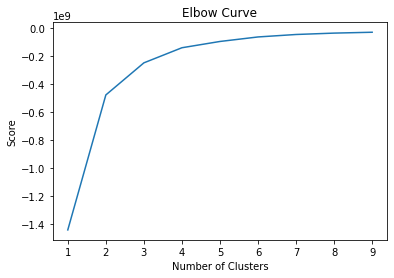

In [94]:
# Ploting elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a big jump from two to three clusters, but after that, the curve straightens out, this means that the optimal count of clusters is three.

### 4. k-means clustering <a name="paragraph3"></a>

In [95]:
# Creating  k-means object
kmeans = KMeans(n_clusters = 3) 

In [96]:
# Attaching new 'clusters' colum to compressed data frame 'df_comp'
df_comp['clusters'] = kmeans.fit_predict(df_comp)

In [97]:
# Also attaching new 'clusters' colum to orignal data frame 'df_comp' as it's maybe needed for futur analyses 
df['clusters'] = kmeans.fit_predict(df_comp)

In [98]:
# Checking head of compressed data frame 'df_comp'
df_comp.head()

,bedrooms,price,number_of_reviews,clusters
0,1.0,1285.0,72,1
2,1.0,745.0,32,0
3,1.0,667.0,78,0
4,1.0,598.0,45,0
5,1.0,226.0,23,0


In [99]:
# Counting values of clusters
df_comp['clusters'].value_counts()

1    2248
0    2018
2     947
Name: clusters, dtype: int64

### 5. Visualisations <a name="paragraph4"></a>

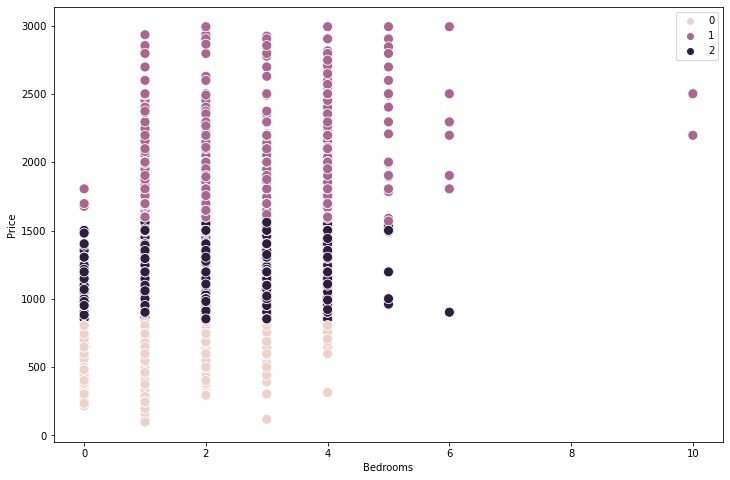

In [67]:
# Plotting  clusters for the "price" and "bedrooms" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bedrooms'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bedrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Cluster number 1 groups listings with at least one bedroom and majorily listings with a price above 1500 SEK. This means that the price of the listings can be higher if it has at least one bedroom, which is logical as guests usually stay over night. Cluster number 1 also groups listings with more than four bedroom and listings with a price above 1500 SEK. 

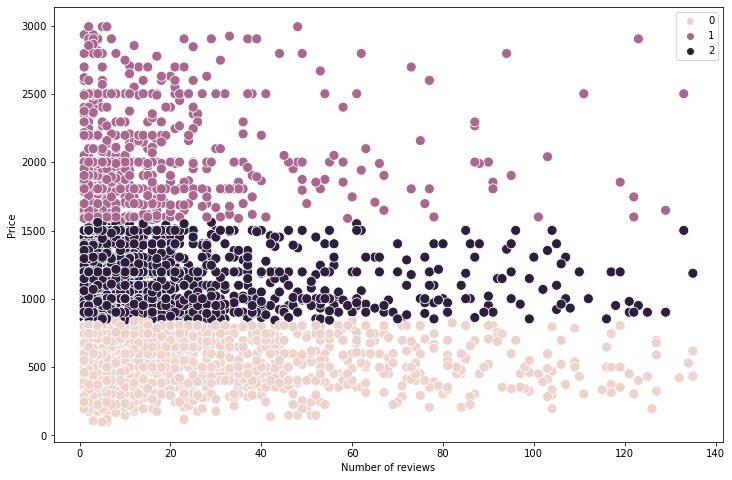

In [68]:
# Plotting clusters for the "price" and "number_of_reviews" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_reviews'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of reviews') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Cluster zero, includes points with a higher number of reviews and lower prices than cluster number 1 and 2. There are less reviews in clusters 1 and 2 as the majority of reviews gets submitted for listings with prices below 800.

In [100]:
df_comp.loc[df_comp['clusters'] == 2, 'cluster'] = 'Cluster 2 (dark purple)'
df_comp.loc[df_comp['clusters'] == 1, 'cluster'] = 'Cluster 1 (purple)'
df_comp.loc[df_comp['clusters'] == 0, 'cluster'] = 'Cluster 3 (pink)'

In [101]:
df.head()

,id,name,host_id,host_since,street,neighbourhood,city,state,zipcode,country,latitude,longitude,property_type,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month,price_group,clusters
0,145320,In the middle of it all - with a view!,703851,2011-06-15,"Stockholm, Stockholms laen, Sweden",Soedermalm,Stockholm,Stockholms laen,118 53,Sweden,5.931.364,1.805.256,Apartment,1.0,1285.0,2,0,72,97.0,1,2,High Price,0
2,170651,Petit Charm Rooftop next to heaven,814021,2011-07-13,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11737,Sweden,5.931.568,1.803.138,Apartment,1.0,745.0,3,197,32,93.0,1,0,Middle Price,2
3,206221,Doubleroom at Soedermalm &trendySofo,1022374,2011-08-26,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11639,Sweden,5.931.226,1.807.942,Bed and breakfast,1.0,667.0,3,332,78,98.0,1,0,Middle Price,2
4,220851,One room in appartement,412283,2011-02-27,"Stockholm, Stockholm County, Sweden",Kungsholmen,Stockholm,Stockholm County,11341,Sweden,5.933.376,1.803.816,Apartment,1.0,598.0,3,336,45,93.0,1,0,Middle Price,2
5,259722,Near shopping-IT Business(Bunk bed),1261494,2011-10-07,"Stockholm, Stockholm County, Sweden",Rinkeby-Kista,Stockholm,Stockholm County,16474,Sweden,5.941.003,179.366,Apartment,1.0,226.0,21,307,23,92.0,1,0,Low Price,2


In [107]:
df['clusters'].value_counts()

2    2361
0    2148
1     704
Name: clusters, dtype: int64

In [111]:
cluster_stats = df_comp.groupby('cluster').agg({'bedrooms':['mean', 'median'], 
                                'price':['mean', 'median'], 
                                'number_of_reviews':['mean', 'median'],})
cluster_stats

bedrooms               price          \
                             mean median         mean  median   
cluster                                                         
Cluster 1 (purple)       1.354982    1.0  1024.657918  1001.0   
Cluster 2 (dark purple)  2.380148    2.0  1888.061246  1805.0   
Cluster 3 (pink)         0.991576    1.0   532.427651   549.0   

                        number_of_reviews         
                                     mean median  
cluster                                           
Cluster 1 (purple)              14.432384    7.0  
Cluster 2 (dark purple)         14.229145    7.0  
Cluster 3 (pink)                17.754708    8.0

####  When looking at the median of the number of bedrooms and the median of price, cluster one takes the highest median price with only one bedroom, while only getting 1 review less in the median. So the cluster could mark the sweet spot and the best cost/benefit. 

In [109]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'airbnb_df_clusters_upd.csv'))
cluster_stats.to_csv(os.path.join(path, '02 Data','Prepared Data', 'clusters_stats.csv'))

### 6. Summary & Outlook<a name="paragraph5"></a>

#### In this cluster analysis, from an investing standpoint, cluster 1 could be the best one as it's cost/benefits ratio is the best, as it hast the highest price while only one bedroom, which should be most of the times be cheaper to buy. Cluster 2 has the highest potential for higher prices. Cluster 3 on the other has a higher number of reviews, which could be reasoned in the higher number of bookings. Therefore a analysis about the number of bookings for the listings should be conducted. For a Analytics pipeline the median price per listings compared to the review scores rating on a daily basis and in a year of year comparison can be interessting. Also the exploration of seasonal price increases for example during the christmas or holiday season.